# Data Post Processing in Pandas

### Install Requirements
(run only once)

In [ ]:
%pip install pandas matplotlib

### Read CSV

In [108]:
import pandas as pd
data = pd.read_csv('data/example/launch_01.csv', sep=None, index_col=0)
# data.index = pd.to_timedelta(data.index, unit='ms')

data

data.to_csv('data/example/launch_02.csv')

/var/folders/rs/4ym7352x37df592tnnlbw2mm0000gn/T/ipykernel_90837/2974206734.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('data/example/launch_01.csv', sep=None, index_col=0)


### Display Data

  * select columns and plot

<Axes: xlabel='millis'>

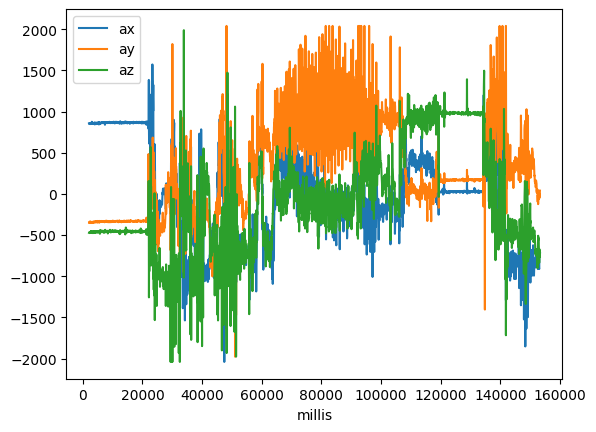

In [102]:
data[['ax', 'ay', 'az']].plot()


### Post-Processing

Looks like the rocket was inert at the start, and again around 120s - we hypothesize that the rocket landed just before second 120 and was started less than 10s before that.

Let's select that timerange!

<Axes: xlabel='millis'>

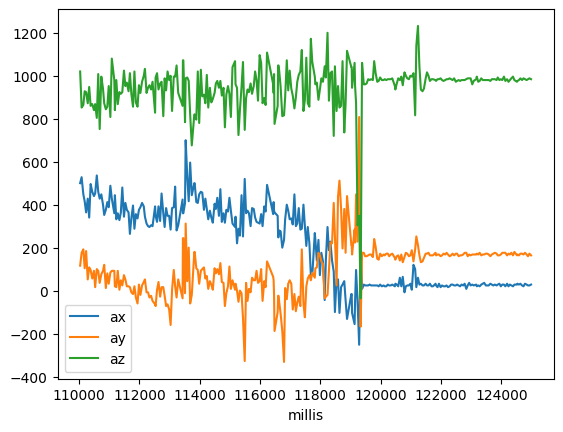

In [103]:
flight = data[(data.index > 110000) & (data.index < 125000)]
flight[['ax', 'ay', 'az']].plot()

### Augment Data

Add total acceleration:

<Axes: xlabel='millis'>

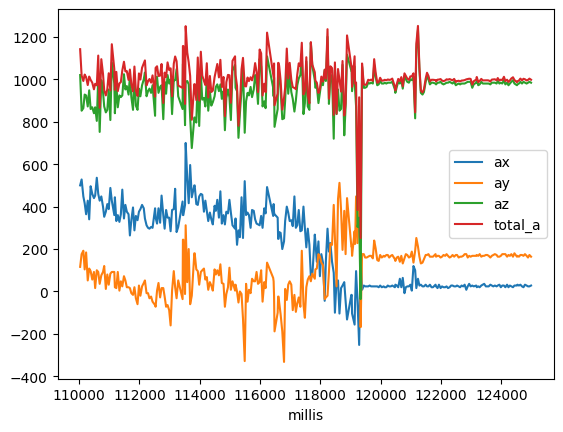

In [109]:
import numpy as np
data['total_a'] = np.sqrt(data['ax']**2 + data['ay']**2 + data['az']**2)
flight = data[(data.index > 110000) & (data.index < 125000)]

flight[['ax', 'ay', 'az', 'total_a']].plot()